In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer, PegasusForConditionalGeneration, PegasusTokenizer

bart_model_path = "/content/drive/MyDrive/bart_model"
pegasus_model_path = "/content/drive/MyDrive/your_model_directory"

# Load BART
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_path)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_path)

# Load PEGASUS
pegasus_model = PegasusForConditionalGeneration.from_pretrained(pegasus_model_path)
pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_path)


In [ ]:
import time

def measure_latency(model, tokenizer, dialogue, max_length=200):
    """
    Measure the time taken for the model to generate a summary.
    """
    inputs = tokenizer(dialogue, return_tensors="pt", truncation=True)
    start_time = time.time()

    # Generate summary
    summary_ids = model.generate(inputs["input_ids"], max_length=max_length, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    end_time = time.time()
    latency = end_time - start_time

    return latency, summary


In [ ]:
sample_dialogue = """
Customer: Hi, I’m having trouble with my internet connection. It keeps dropping out, and I’m not sure why.

Support Agent: I’m sorry to hear that. Can you tell me when you first noticed the issue and if there were any changes to your setup recently?

Customer: I noticed it started happening about two days ago. I didn’t change anything, but I did move the router to a different spot in the room.

Support Agent: Moving the router can sometimes affect the signal. Can you try moving it back to its original position and see if the problem persists?

Customer: Okay, I’ve moved it back to where it was before. It seems like the connection is still unstable.

Support Agent: Thanks for trying that. Let’s check if there are any firmware updates available for your router. Sometimes updates can resolve connectivity issues.

Customer: How do I check for firmware updates?

Support Agent: You can usually check for updates by logging into your router’s settings page through your web browser. Look for a section on firmware updates or software updates.

Customer: I found the update section. It looks like there is an update available. Should I proceed with it?

Support Agent: Yes, go ahead and apply the update. After it’s finished, restart your router and check if the connection stabilizes.

Customer: Alright, I’ll do that. Thanks for your help!

Support Agent: You’re welcome! If you continue to have issues, feel free to reach out again. Have a great day!
"""


# Test BART
bart_latency, bart_summary = measure_latency(bart_model, bart_tokenizer, sample_dialogue)
print(f"BART Latency: {bart_latency:.4f} seconds")
print(f"BART Generated Summary: {bart_summary}")

# Test PEGASUS
pegasus_latency, pegasus_summary = measure_latency(pegasus_model, pegasus_tokenizer, sample_dialogue)
print(f"PEGASUS Latency: {pegasus_latency:.4f} seconds")
print(f"PEGASUS Generated Summary: {pegasus_summary}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


BART Latency: 5.7183 seconds
BART Generated Summary: Customer's internet connection keeps dropping out. He moved the router to a different place two days ago, but the connection still doesn't work. He will apply a firmware update to his router and check if the connection stabilizes after it's finished. If it doesn't, he will reach out again.
PEGASUS Latency: 4.1485 seconds
PEGASUS Generated Summary: Customer is having trouble with his internet connection. He noticed it started happening about two days ago. He moved the router to a different spot in the room. Support Agent suggests checking for firmware updates.


In [ ]:
def run_latency_tests(model, tokenizer, dialogue, num_trials=20):
    latencies = []
    for _ in range(num_trials):
        latency, _ = measure_latency(model, tokenizer, dialogue)
        latencies.append(latency)
    average_latency = sum(latencies) / len(latencies)
    return average_latency

# Run tests for both models
bart_avg_latency = run_latency_tests(bart_model, bart_tokenizer, sample_dialogue)
pegasus_avg_latency = run_latency_tests(pegasus_model, pegasus_tokenizer, sample_dialogue)

print(f"Average BART Latency: {bart_avg_latency:.4f} seconds")
print(f"Average PEGASUS Latency: {pegasus_avg_latency:.4f} seconds")


Average BART Latency: 4.4593 seconds
Average PEGASUS Latency: 4.3915 seconds


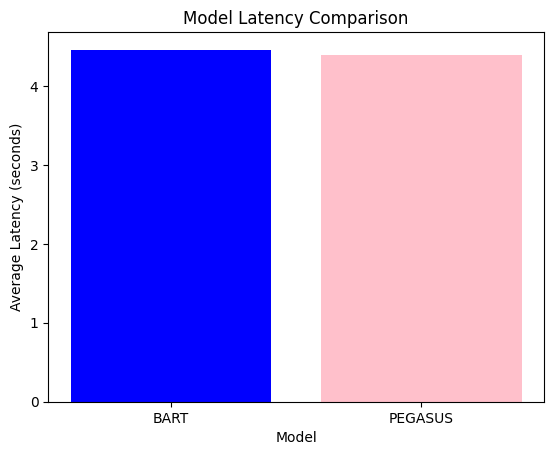

In [ ]:
import matplotlib.pyplot as plt

models = ['BART', 'PEGASUS']
latencies = [bart_avg_latency, pegasus_avg_latency]

plt.bar(models, latencies, color=['blue', 'pink'])
plt.xlabel('Model')
plt.ylabel('Average Latency (seconds)')
plt.title('Model Latency Comparison')
plt.show()
